In [ ]:
#####################################################################################################################
#   Tweets Clustering using k-means
#
#   Edilberto Carrizales
#####################################################################################################################

import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

url = "https://drive.google.com/file/d/1DOPibLiesE9ErAV5gRPdM5kHpJOxH4zB/view?usp=sharing"
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

In [ ]:
# Reading the data file into a Pandas dataframe 'df' and adding the column names
# Notes: 
# -If the data does not have column names, you can find the column names from the attribute 
#   information where you got the data from and add them below as names = ["column1", "column2", "column3", "etc"].
# -If the data is written together with a seperator/delimiter (such as a comma or semicolon), you can seperate the
#   data using sep = "delimiter here" as I have done below.
original_df = pd.read_csv(dwn_url, names = ["TweetID", "DateAndTime", "Tweet"], sep = "|")

In [ ]:
# Displays our data in rows x columns with the column names (if no column names, then you must manually add column name above)
original_df

,TweetID,DateAndTime,Tweet
0,548662191340421120,Sat Dec 27 02:10:34 +0000 2014,Risks in Using Social Media to Spot Signs of M...
1,548579831169163265,Fri Dec 26 20:43:18 +0000 2014,RT @paula_span: The most effective nationwide ...
2,548579045269852161,Fri Dec 26 20:40:11 +0000 2014,The New Old Age Blog: Diabetes Prevention That...
3,548444679529041920,Fri Dec 26 11:46:15 +0000 2014,Well: Comfort Casseroles for Winter Dinners ht...
4,548311901227474944,Fri Dec 26 02:58:39 +0000 2014,High-Level Knowledge Before Veterans Affairs S...
...,...,...,...
6040,318864599728414720,Mon Apr 01 23:16:59 +0000 2013,Letters: Hpv Vaccines for Boys http://nyti.ms/...
6041,318860789899476992,Mon Apr 01 23:01:51 +0000 2013,Health Law Provision for Small Business Is Del...
6042,318860787605176321,Mon Apr 01 23:01:50 +0000 2013,Global Health: Gay Men in Mexico City Would St...
6043,318856950890766336,Mon Apr 01 22:46:35 +0000 2013,Multiple Sclerosis Balloon Therapy Fails in St...


In [ ]:
# Pre-processing Steps:

In [ ]:
# Remove the tweet id and timestamp:

# Remove 'tweet ID' column
clean_df = original_df.drop(columns = ['TweetID'])

# Remove 'date and time' column
clean_df = clean_df.drop(columns = ['DateAndTime'])

In [ ]:
#Shows our df without the unnecesary columns
clean_df

,Tweet
0,Risks in Using Social Media to Spot Signs of M...
1,RT @paula_span: The most effective nationwide ...
2,The New Old Age Blog: Diabetes Prevention That...
3,Well: Comfort Casseroles for Winter Dinners ht...
4,High-Level Knowledge Before Veterans Affairs S...
...,...
6040,Letters: Hpv Vaccines for Boys http://nyti.ms/...
6041,Health Law Provision for Small Business Is Del...
6042,Global Health: Gay Men in Mexico City Would St...
6043,Multiple Sclerosis Balloon Therapy Fails in St...


In [ ]:
# Remove any word that starts with the symbol @ e.g. @AnnaMedaris
clean_df['Tweet'] = clean_df['Tweet'].str.replace(r'@\S+','')

# Remove "RT" words since these appear before @ and are useless
clean_df['Tweet'] = clean_df['Tweet'].str.replace('RT','')

# Remove any hashtag symbols e.g. convert #depression to depression
clean_df['Tweet'] = clean_df['Tweet'].str.replace('#','')

# Remove any colons ":" or apostrophes "'", periods ".", and commas ",", question marks "?"
# exclamation marks "!", &", and semicolon ";"
clean_df['Tweet'] = clean_df['Tweet'].str.replace(':','')
clean_df['Tweet'] = clean_df['Tweet'].str.replace("’",'')
clean_df['Tweet'] = clean_df['Tweet'].str.replace(".",'')
clean_df['Tweet'] = clean_df['Tweet'].str.replace(",",'')
clean_df['Tweet'] = clean_df['Tweet'].str.replace("?",'')
clean_df['Tweet'] = clean_df['Tweet'].str.replace("!",'')
clean_df['Tweet'] = clean_df['Tweet'].str.replace("&",'')
clean_df['Tweet'] = clean_df['Tweet'].str.replace(";",'')

# Remove any URL
clean_df['Tweet'] = clean_df['Tweet'].str.replace(r'http\S+', '')

# Convert every word to lowercase
clean_df['Tweet'] = clean_df['Tweet'].str.lower()

<ipython-input-18-427dc43dfcee>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df['Tweet'] = clean_df['Tweet'].str.replace(r'@\S+','')
<ipython-input-18-427dc43dfcee>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df['Tweet'] = clean_df['Tweet'].str.replace(".",'')
<ipython-input-18-427dc43dfcee>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df['Tweet'] = clean_df['Tweet'].str.replace("?",'')
<ipython-input-18-427dc43dfcee>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df['Tweet'] = clean_df['Tweet'].str.replace(r'http\S+', '')


In [ ]:
# Shows our data without @ words, without # and without any URLs
# It also has every tweet in lowercase
clean_df

,Tweet
0,risks in using social media to spot signs of m...
1,the most effective nationwide diabetes preve...
2,the new old age blog diabetes prevention that ...
3,well comfort casseroles for winter dinners
4,high-level knowledge before veterans affairs s...
...,...
6040,letters hpv vaccines for boys
6041,health law provision for small business is del...
6042,global health gay men in mexico city would sta...
6043,multiple sclerosis balloon therapy fails in st...


In [ ]:
# --Split tweet sentences into words--
all_tweets = []

for i in range(len(clean_df["Tweet"])):
  all_tweets.append(clean_df["Tweet"][i].split(" "))

In [ ]:
all_tweets

------Tweets Clustering using K-means------

----Initial Values----
Initizalization seed: 10
k's used: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
max_iterations: 50  (Note: could converge before reaching max)

-----Running for k = 2-----
Iterative Step: 0
Iterative Step: 1
Did not finish all iterations, converged!

Cluster 1: 4299 tweets
Cluster 2: 1746 tweets
The SSE is: 4472.30

-----Running for k = 3-----
Iterative Step: 0
Iterative Step: 1
Did not finish all iterations, converged!

Cluster 1: 3250 tweets
Cluster 2: 934 tweets
Cluster 3: 1861 tweets
The SSE is: 4403.20

-----Running for k = 4-----
Iterative Step: 0
Iterative Step: 1
Iterative Step: 2
Iterative Step: 3
Iterative Step: 4
Did not finish all iterations, converged!

Cluster 1: 1825 tweets
Cluster 2: 2438 tweets
Cluster 3: 606 tweets
Cluster 4: 1176 tweets
The SSE is: 4226.52

-----Running for k = 5-----
Iterative Step: 0
Iterative Step: 1
Iterative Step: 2
Did not finish all iterations, converged!

Cluster 1: 2316 tweets
Clust

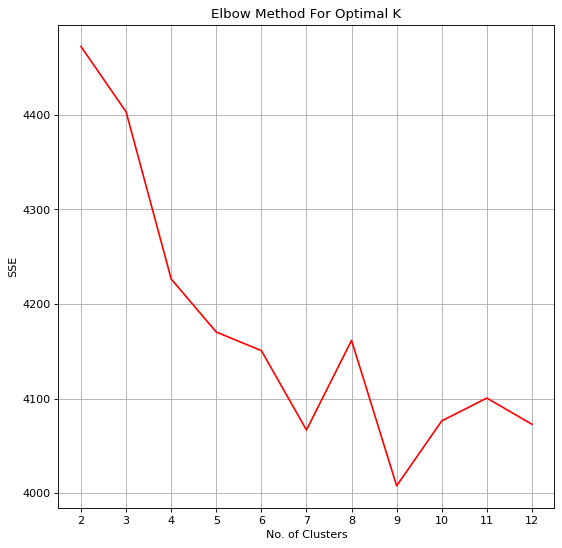

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Implement the tweet clustering function using the Jaccard Distance metric and K-means
#   clustering algorithm to cluster redundant/repeated tweets into the same cluster. 

# Steps to do the clustering:

# 1. Define number of K clusters

# 2. Initialize the k clusters centers/parameters randomly

# Repeat - iterative step assign data instances to closest cluster center
#    3. Form K clusters by assigning all points to the closest centroid
#    4. Recompute the centroid of each cluster

# 5. repeat the two steps above until the centroids dont change, once they 
#    don't change we stop since it converged

# ------------

# --------------Implementation--------------

def main():
  #1. Define Number of K clusters and other initial values:
  #multi_k = [3] # the number of clusters
  multi_k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] # to try multiple values of k's
  max_iter = 50 # number of iterations to run
  k_means_seed = 10 # seed to keep initialization values the same and get same output (set to -1 to get random values every run)
  sse_arr = [] # store all sse to use for elbow curve

  if k_means_seed != -1:
    random.seed(k_means_seed)
  else:
    k_means_seed = "Random Seed"

  print("------Tweets Clustering using K-means------\n")
  print("----Initial Values----")
  print("Initizalization seed: " + str(k_means_seed))
  print("k's used: " + str(multi_k))
  print("max_iterations: " + str(max_iter) + "  (Note: could converge before reaching max)\n")

  for k in multi_k: # runs for every k in the multi_k array
    #Steps 2, 3, 4 run here
    clusters = k_means_algorithm(k, max_iter)

    #Prints tweet cluster sizes and sse
    sse = print_cluster_and_sse(clusters)
    sse_arr.append(sse)

  # print the elbow curve
  elbow_optimal_k(multi_k, sse_arr)


def k_means_algorithm(k, max_iter):
  # -----------------k-means model-----------------

  # arrays and dict initializations
  centroids = []
  clusters = []
  tweet_dict = {}
  previous_centroids = []

  # 2. Initialize the k clusters centers/parameters randomly
  # The centroids I initialize will simply be random tweets
  counter = 0
  while counter < k:
    #creating k random tweets as these will be the clusters centroids
    random_tweet = random.randint(0, len(all_tweets) - 1)

    # If the random tweet is not in the dictionary, we append it with a value of 1
    if random_tweet not in tweet_dict:
      tweet_dict[random_tweet] = True
      centroids.append(all_tweets[random_tweet])
      counter += 1
  
  # -------Repeating loop (to iterate over steps 3 and 4)-------
  print("-----Running for k = " + str(k) + "-----")
  curr_iter = 0
  while curr_iter < max_iter:
    # If the previous centroids match the new centroids, this means that
    #   the centroids did not change, which means that we converged, so we break

    #Stop the loop if previous centroids are same as current because it means we have converged
    if centroids == previous_centroids:
      break

    print("Iterative Step: " + str(curr_iter))

    # 3. Form K clusters by assigning all points to the closest centroid
    # To find the jaccard distance from a tweet to a centroid (we need to 
    #   find the distance from each tweet to each of the K centroids and the min
    #   distance of those K centroids is the centroid we will assign it to, since its the closest)
    clusters = assign_to_cluster(all_tweets, centroids)

    previous_centroids = centroids # save the previous centroids

    # 4. Recompute/Update the centroid of each cluster
    # How to assign the recomputed centroid to the previous centorid label?
    centroids = clusters_center_tweet(clusters)

    # until:
    # current iteration is equal to max iterations (or until converged)
    curr_iter += 1

    # print the clusters and sse every iteration (for debugging purposes)
    #print_cluster_and_sse(clusters)

  if (curr_iter == max_iter):
    print("Finished all iterations, did not converge.\n")
  else:
    print("Did not finish all iterations, converged!\n")

  return clusters

def elbow_optimal_k(multi_k, sse_arr):
  figure(figsize=(8, 8), dpi=80)
  #range(1, (len(multi_k)+1)
  x = multi_k
  y = sse_arr
  plt.plot(x, y, color="red")
  plt.xlabel("No. of Clusters")
  plt.ylabel("SSE")
  plt.title("Elbow Method For Optimal K")
  plt.grid()
  plt.xticks(x, x)
  plt.show()

#Function to print the number of tweets in each cluster and SSE value
def print_cluster_and_sse(clusters):

  # Print the number of tweets in each cluster
  for cluster in range(len(clusters)):
    print("Cluster " + str(cluster+1) + ":", str(len(clusters[cluster])) + " tweets")

  # Now we compute the sum of squared error (SSE)
  sse = 0
  # To compute the SSE we will iterate every cluster and SSE will be the sum of square of all the distances of each tweet from its centroid
  for cluster in range(len(clusters)):
    for tweet in range(len(clusters[cluster])):
      sse += (clusters[cluster][tweet][1])**2

  formatted_sse = '{0:.2f}'.format(sse)
  print("The SSE is: " + str(formatted_sse) + "\n")

  return sse

#-----Functions below are used by main function to assign tweets to clusters----
#                 as well as update the clusters centroids.

def assign_to_cluster(all_tweets, centroids):
  clusters = {} # stores clusters

  # For every single tweet, we will iterate through all the centroids and
  #   assign it to the closest centroid
  for tweet in range(len(all_tweets)):
    # stores all the distances (from a tweet to every cluster)
    # Note:(Resets every loop for the next tweet)
    min_centroid_distance = math.inf
    cluster_label = -1

    for centroid in range(len(centroids)):
      distance = jaccard_distance(centroids[centroid], all_tweets[tweet]) #calculate jaccard distance
      # If they are the same (since we randomized them in the beggining, simply set the min distance to 0)
      if all_tweets[tweet] == centroids[centroid]:
        min_centroid_distance = 0
        cluster_label = centroid
        break
      
      if distance < min_centroid_distance:
        # Else, they are not the same so we give it the min distance
        min_centroid_distance = distance #min(tweet_to_cluster_dist)
        cluster_label = centroid
    
    # If the tweet is completely different from all centroids (i.e., 1) ( No overlapping words in any)
    if min_centroid_distance == 1:
      # Then we set it to a random centroid (since jaccard distance is minimum for all)
      cluster_label = random.randint(0, len(centroids) - 1)

    # The closest centroid is assigned to a tweet
    if cluster_label not in clusters:
      clusters[cluster_label] = []
    clusters[cluster_label].append([all_tweets[tweet]])

    # Save the tweet distance so we can use it for SSE
    tweet_index = len(clusters.setdefault(cluster_label, [])) - 1

    if cluster_label not in clusters:
      clusters[cluster_label] = []
    clusters[cluster_label][tweet_index].append(min_centroid_distance)

  return clusters

# Function to calculate the distance from every tweet to every other tweet
#   in each cluster so so that we can set that min distance tweet as the new center 
def clusters_center_tweet(clusters):
  centroids = [] # store the new centroids found that were the min tweets of the cluster

  # Loop iteraters every cluster
  for cluster in range(len(clusters)):
    min_tweet_dist_sum = math.inf
    centroid_index = -1

    # Following nested loops are used to calculate the distance from every tweet to
    #   every other tweet so that we can find the min tweet (i.e., the tweet at the 
    #   the center of the cluster) this tweet will become the new centroid
    for tweetA in range(len(clusters[cluster])):
      tweet_to_tweet_distances = [] # to save every distance from one tweet (also clears distances previosly saved, every loop)
      for tweetB in range(len(clusters[cluster])):
        # Calculate the jaccard distance from one tweet in a cluster to another tweet in that same cluster
        distance = jaccard_distance(clusters[cluster][tweetA][0], clusters[cluster][tweetB][0])
        tweet_to_tweet_distances.append(distance) #append the distance to the array

      # If the sum of all the tweet to tweet distances is less than the current min_tweet_dist_sum
      # This means that this tweetA is the one closest to the center of the cluster
      # After all the loops, the minimum tweet (the last that was saved) will be the new centroid
      if sum(tweet_to_tweet_distances) < min_tweet_dist_sum:
        min_tweet_dist_sum = sum(tweet_to_tweet_distances)
        centroid_index = tweetA

    # Set the tweet that was at the center of the cluster as the new centroid
    centroids.append(clusters[cluster][centroid_index][0])

  return centroids

# calculates the jaccard distance between two tweets
def jaccard_distance(tweetA, tweetB):
  # Intersection
  inter = set(tweetA).intersection(tweetB)
  # Union
  union = set().union(tweetA, tweetB)
  # Jaccard Distance
  distance = 1 - (len(inter)/len(union))

  return distance

# requierment to run main even when other functions are declared after it
if __name__ == '__main__':
    main()